In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('Titanic-Dataset.csv') 

# Preview the data
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
print(df.count())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [4]:
print(df.shape)

(891, 12)


In [5]:
print(df.size)

10692


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
# Summary statistics
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:
#checking missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [10]:
categorical_columns=df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].fillna('unkown')

In [11]:
# Confirm that missing values are handled
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [12]:
print(df.count())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64


In [13]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [14]:
# Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Applying label encoding to the 'sex' and 'embarked' columns
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'].fillna('S')) # Fill missing values with 'S' (most common value)


In [15]:
# Now your 'sex' and 'embarked' columns are converted to numerical values
print(df[['Sex', 'Embarked']].head())

   Sex  Embarked
0    1         2
1    0         0
2    0         2
3    0         2
4    1         2


In [16]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
numerical_columns = ["PassengerId","Survived","Pclass","SibSp","Parch"] 
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numerical features
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [17]:
# Now the numerical columns are normalized (range 0-1)
print(df[numerical_columns].head())

   PassengerId  Survived  Pclass  SibSp  Parch
0     0.000000       0.0     1.0  0.125    0.0
1     0.001124       1.0     0.0  0.125    0.0
2     0.002247       1.0     1.0  0.000    0.0
3     0.003371       1.0     0.0  0.125    0.0
4     0.004494       0.0     1.0  0.000    0.0


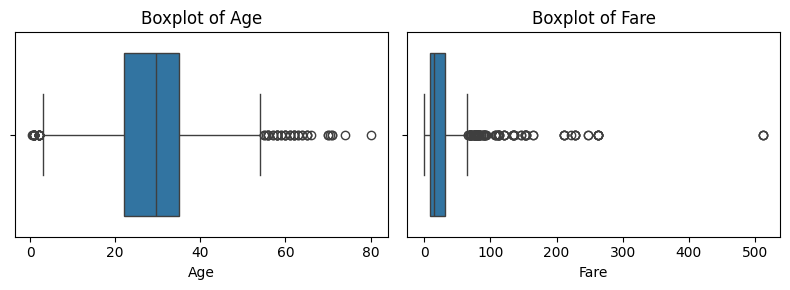

In [18]:
# Visualize outliers using boxplots and remove them
import seaborn as sns
import matplotlib.pyplot as plt
numerical1_columns=["Age","Fare"]
# Create boxplots to visualize outliers
plt.figure(figsize=(8, 3))
for i, column in enumerate(numerical1_columns):
    plt.subplot(1, len(numerical1_columns), i + 1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [19]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Remove outliers from each numerical column
for column in numerical_columns:
    df = remove_outliers(df, column)


In [21]:
# Now df will have the outliers removed
print(df[numerical_columns].head())

   PassengerId  Survived  Pclass  SibSp  Parch
0     0.000000       0.0     1.0  0.125    0.0
1     0.001124       1.0     0.0  0.125    0.0
2     0.002247       1.0     1.0  0.000    0.0
3     0.003371       1.0     0.0  0.125    0.0
4     0.004494       0.0     1.0  0.000    0.0
